In [5]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


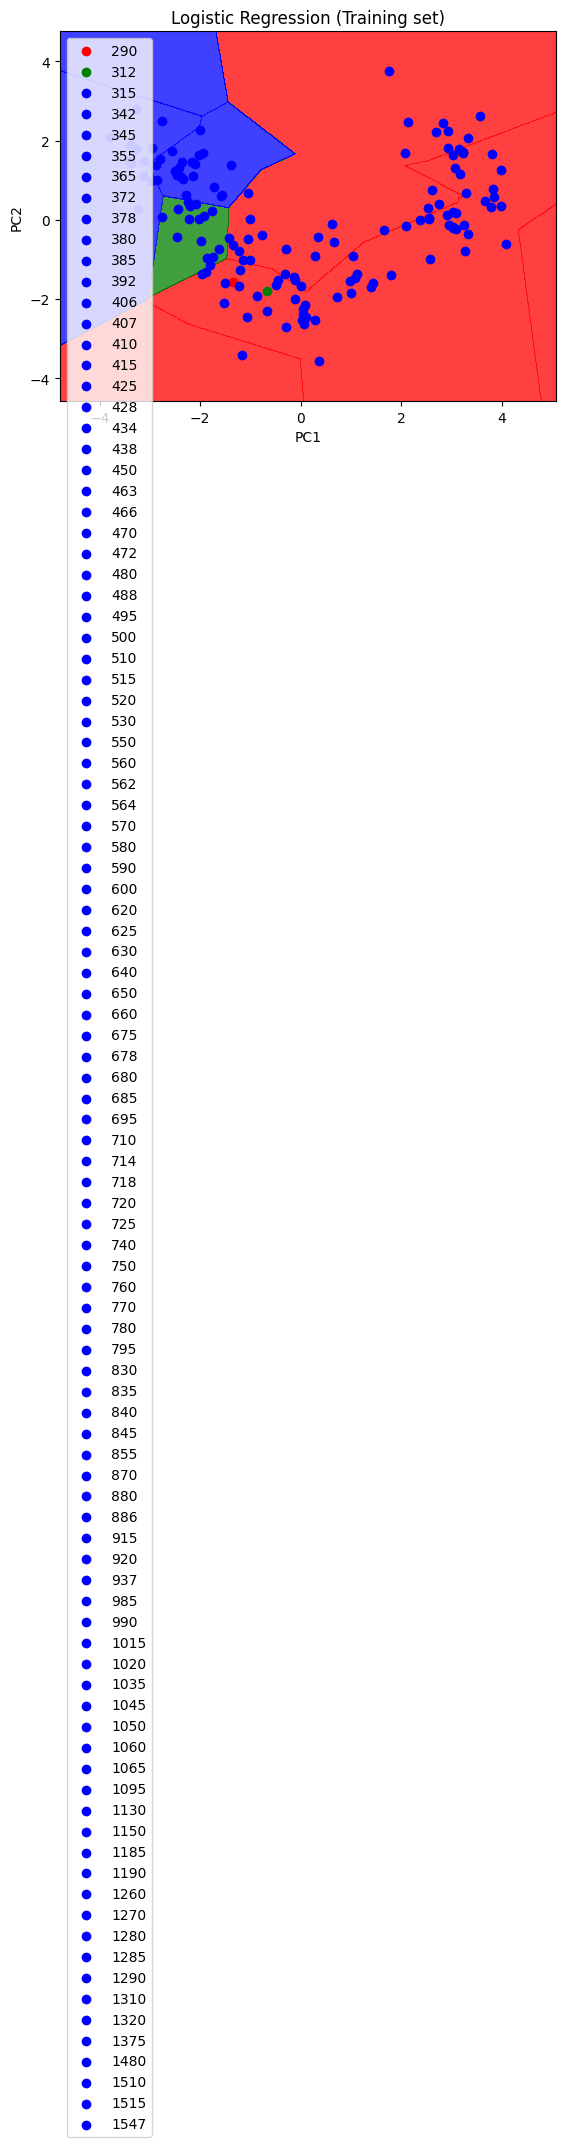

In [6]:
from matplotlib import legend

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('wine.csv')
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance = pca.explained_variance_ratio_

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 0)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
hasil_variance2 = pca.explained_variance_ratio_

from sklearn.linear_model import LogisticRegression
mesin_klasifikasi = LogisticRegression(random_state = 0)
mesin_klasifikasi.fit(X_train, y_train)

y_pred = mesin_klasifikasi.predict(X_test)

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid( np.arange(start=X_set[:, 0].min() - 1, stop=X_set[:, 0].max() + 1, step=0.01),
                      np.arange(start=X_set[:, 1].min() - 1, stop=X_set[:, 1].max() + 1, step=0.01))
plt.contourf(X1, X2, mesin_klasifikasi.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim (X2.min(), X2.max())
for i, j in enumerate(np. unique (y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], color=ListedColormap(('red', 'green', 'blue'))(i), label=j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()